## The Sparks Foundation - Data Science and Business Analytics Intern 
## Task - 1 : Prediction using Supervised ML on Student Dataset (Prediction of Percentage)
## Author : Arya Jaideep Patole 

In [1]:
#importing libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
sns,set()
%matplotlib inline

In [2]:
# Reading data
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")
s_data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


<AxesSubplot:>

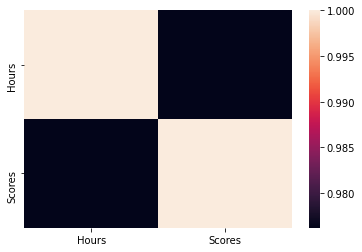

In [3]:
sns.heatmap(s_data.corr())

<AxesSubplot:>

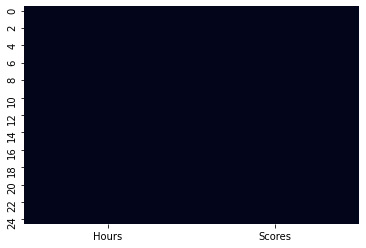

In [4]:
sns.heatmap(s_data.isnull(), cbar=False)

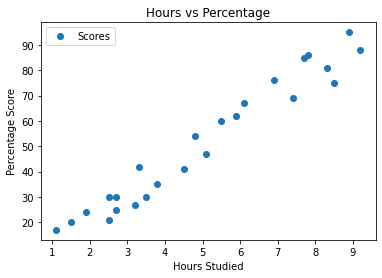

In [5]:
# Plotting the distribution of scores
s_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [6]:
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values 

In [7]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [8]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


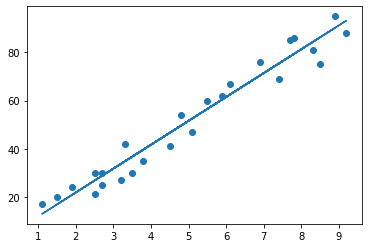

In [9]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [10]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [11]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [12]:
#predicting score for 9.25 hours
h=9.25
hours =np.reshape(h,(-1,1))
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737535


In [13]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
